In [1]:
import warnings
warnings.filterwarnings("ignore")



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas_datareader as pdr
from pandas_profiling import ProfileReport

%matplotlib inline
import matplotlib
import seaborn as sns
%reload_ext autoreload
%autoreload 2

import datetime
from datetime import datetime
plt.style.use('fivethirtyeight')


In [2]:
# pip install statsmodels

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import pandas_datareader
import datetime
import pandas_datareader.data as web

In [4]:
start = datetime.datetime(2017,1,1)
end = datetime.datetime.today()


In [5]:
#another way to set up dates:
#start = pd.to_datetime('2015-01-01')
#end = pd.to_datetime('2020-01-01')

In [7]:
# Get stock price from Yahoo wbsite
apl = web.DataReader('AAPL', 'yahoo', start, end)
googl = web.DataReader('GOOGL', 'yahoo', start, end)
amzn = web.DataReader('AMZN', 'yahoo', start, end)
mst = web.DataReader('MSFT', 'yahoo', start, end)
tesla = web.DataReader('TSLA', 'yahoo', start, end)
gs = web.DataReader('GS', 'yahoo', start, end)
jpmc = web.DataReader('JPM', 'yahoo', start, end)


In [8]:
# pdr. used for getting data from (website) 

#apl = pdr.get_data_yahoo('AAPL')


In [9]:
gs.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,244.970001,237.970001,242.699997,241.570007,4384200.0,218.627548
2017-01-04,243.320007,240.029999,241.440002,243.130005,2728700.0,220.039368
2017-01-05,243.229996,236.779999,242.720001,241.320007,3562600.0,218.401321
2017-01-06,246.199997,241.369995,242.289993,244.899994,3591100.0,221.641312
2017-01-09,244.690002,241.470001,243.250000,242.889999,3022800.0,219.822128


In [10]:
jpmc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,87.760002,85.980003,87.339996,87.230003,20550700.0,74.436737
2017-01-04,87.180000,86.400002,86.959999,86.910004,15266600.0,74.574028
2017-01-05,87.110001,85.260002,86.809998,86.110001,14300800.0,73.887573
2017-01-06,86.620003,85.940002,86.389999,86.120003,12893300.0,73.896149
2017-01-09,86.769997,85.519997,85.730003,86.180000,12806600.0,73.947647


In [11]:
apl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1415 entries, 2017-01-03 to 2022-08-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1415 non-null   float64
 1   Low        1415 non-null   float64
 2   Open       1415 non-null   float64
 3   Close      1415 non-null   float64
 4   Volume     1415 non-null   float64
 5   Adj Close  1415 non-null   float64
dtypes: float64(6)
memory usage: 77.4 KB


In [12]:
googl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,40.571999,39.844501,40.030998,40.400501,39180000.0,40.400501
2017-01-04,40.671501,40.205502,40.494499,40.388500,30306000.0,40.388500
2017-01-05,40.687000,40.296001,40.375000,40.651001,26810000.0,40.651001
2017-01-06,41.448002,40.575001,40.749500,41.260502,40342000.0,41.260502
2017-01-09,41.521500,41.081001,41.318501,41.359001,28178000.0,41.359001


In [13]:
apl = apl[['Adj Close']]
googl = googl[['Adj Close']]
amzn = amzn[['Adj Close']]
mst = mst[['Adj Close']]
tesla=tesla[['Adj Close']]
gs = gs[['Adj Close']]
jpmc = jpmc[['Adj Close']]

In [14]:
apl.head()

,Adj Close
Date,
2017-01-03,27.219830
2017-01-04,27.189363
2017-01-05,27.327637
2017-01-06,27.632292
2017-01-09,27.885387


In [15]:
apl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1415 entries, 2017-01-03 to 2022-08-16
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1415 non-null   float64
dtypes: float64(1)
memory usage: 22.1 KB


In [16]:
# we create a normalized return column as: normalized return = (adj.close)/(initial value of adj close)
for stk_df in (apl, googl, amzn,mst,tesla,gs,jpmc):
    stk_df['Normed Return'] = stk_df['Adj Close']/ stk_df.iloc[0]['Adj Close']

# portfolio allocation

1% in   APL
1% in   GOOGL
1% in   AMZN
1.5% in MST
2.5% in tesla
2% in   gs
1% in   MST

i m using (for loop) for above allocation and (zip) above (tuple of stock dataframes) then pass in a list of the allocation percentages Using tuple unpacking to create an Allocation column for (stk_df) equal to the (Normalized Return) times (the allocation)

In [17]:
for stk_df, allo in zip((apl,googl,amzn,mst,tesla,gs,jpmc),[.01,.01,.01,.015,.025,.02,.01]):
    stk_df['Allocation'] = stk_df['Normed Return']*allo

 In each stock, assuming i have an initial portfolio value of  = 10lac Dollars($) i.e.(1000000$).


In [18]:
for stk_df in (apl,googl,amzn,mst,tesla,gs,jpmc):
    stk_df['Position Amount']= stk_df['Allocation']*1000000

In [19]:
apl.head()

,Adj Close,Normed Return,Allocation,Position Amount
Date,,,,
2017-01-03,27.219830,1.000000,0.010000,10000.000000
2017-01-04,27.189363,0.998881,0.009989,9988.807395
2017-01-05,27.327637,1.003961,0.010040,10039.606111
2017-01-06,27.632292,1.015153,0.010152,10151.530058
2017-01-09,27.885387,1.024451,0.010245,10244.512134


 create a portfolio DataFrame for position values of the stocks.

Create a list of all position values(apv),
Concatenate them and set axis=1
Set the column names
Add a total portfolio value column


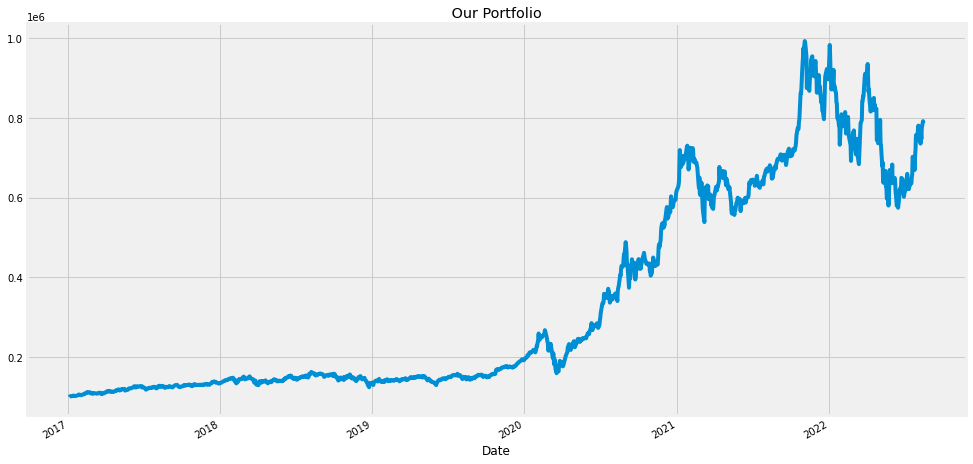

In [20]:
# create list of all position values
all_pos_vals = [apl['Position Amount'],googl['Position Amount'],amzn['Position Amount'],mst['Position Amount'],tesla['Position Amount'],gs['Position Amount'],jpmc['Position Amount']]

# concatenate the list of position values
portfolio_val = pd.concat(all_pos_vals, axis=1)

# set the column names
portfolio_val.columns = ['apple','googl','amzn' ,'mst','tesla','gs','jpmc']

# add a total portfolio column
portfolio_val['Total'] = portfolio_val.sum(axis=1)

portfolio_val['Total'].plot(title = ' Our Portfolio ',figsize=(15,8));

In [21]:
portfolio_val.head()

,apple,googl,amzn,mst,tesla,gs,jpmc,Total
Date,,,,,,,,
2017-01-03,10000.000000,10000.000000,10000.000000,15000.000000,25000.000000,20000.000000,10000.000000,100000.000000
2017-01-04,9988.807395,9997.029483,10046.572846,14932.884859,26152.126858,20129.152933,10018.443978,101265.018352
2017-01-05,10039.606111,10062.004113,10355.328130,14932.884859,26124.475620,19979.304822,9926.224088,101419.827742
2017-01-06,10151.530058,10212.868797,10561.519291,15062.316687,26384.856096,20275.698415,9927.376132,102576.165476
2017-01-09,10244.512134,10237.249509,10573.859217,15014.380546,26646.390264,20109.279923,9934.294545,102759.966138


from above: now we see day by day changes in our portfolio

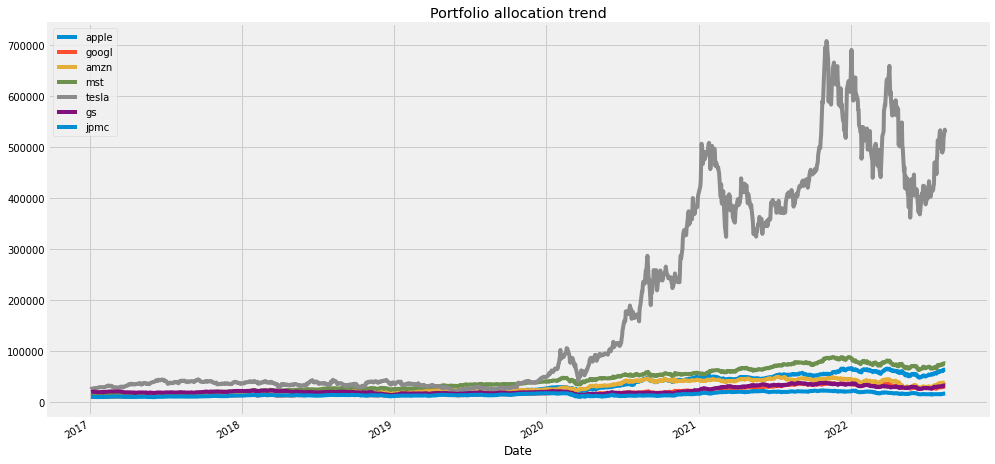

In [22]:
portfolio_val.drop('Total',axis=1).plot(title= 'Portfolio allocation trend' ,figsize=(15,8));

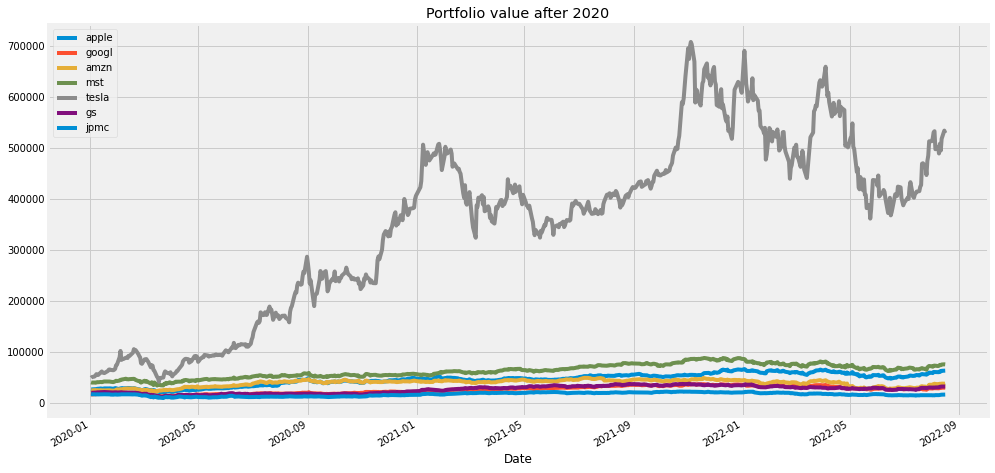

In [23]:
# plot after 2020 value
portfolio_val['2020-01-01':].drop('Total', axis = 1).plot(title= 'Portfolio value after 2020' ,figsize=(15,8));

# Portfolio Statistics

(Daily returns),
(Average daily return),
(Standard deviation),
by use these statistics to calculate our portfolio's Sharpe ratio.

first calculate daily return:

In [24]:
# Daily Return
portfolio_val['Daily Return'] = portfolio_val['Total'].pct_change(1)

In [25]:
portfolio_val.head()

,apple,googl,amzn,mst,tesla,gs,jpmc,Total,Daily Return
Date,,,,,,,,,
2017-01-03,10000.000000,10000.000000,10000.000000,15000.000000,25000.000000,20000.000000,10000.000000,100000.000000,NaN
2017-01-04,9988.807395,9997.029483,10046.572846,14932.884859,26152.126858,20129.152933,10018.443978,101265.018352,0.012650
2017-01-05,10039.606111,10062.004113,10355.328130,14932.884859,26124.475620,19979.304822,9926.224088,101419.827742,0.001529
2017-01-06,10151.530058,10212.868797,10561.519291,15062.316687,26384.856096,20275.698415,9927.376132,102576.165476,0.011401
2017-01-09,10244.512134,10237.249509,10573.859217,15014.380546,26646.390264,20109.279923,9934.294545,102759.966138,0.001792


In [26]:
# average daily return
portfolio_val['Daily Return'].mean()

0.0017310893484175239

In [27]:
# standard deviation
portfolio_val['Daily Return'].std()

0.023242232545066535

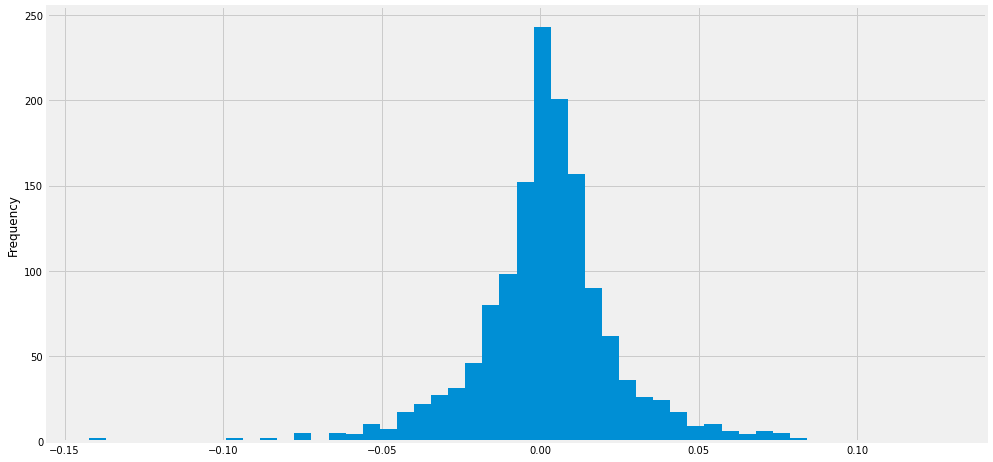

In [28]:
# plot histogram of daily returns
portfolio_val['Daily Return'].plot(kind='hist', bins=50, figsize=(15,8));

In [29]:
# cumulative portfolio return
cum_return = 100 * (portfolio_val['Total'][-1]/portfolio_val['Total'][0] - 1)
cum_return

686.7837421210285

# Sharpe Ratio
The Sharpe Ratio is a measure of risk-adjusted returns.

The Sharpe Ratio is the mean of (portfolio return - the risk-free rate) % standard deviation.

in simple term, the risk-free rate is 0%.


In [30]:
sharpe_ratio = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()
sharpe_ratio

0.07448033854153008

# annualized Sharpe ratio.

This ratio is generally intended to be a yearly measurement, 
to get the annualized Sharpe ratio , multiply S.P by the square root of 252.

In [31]:
asr = (252**0.5) * sharpe_ratio
asr

1.1823387200687265

# So what is a good Sharpe Ratio?

Generally, a Sharpe Ratio > 1 = good (of course depending on risk-tolerance), 
a ratio (2) = very good, 
ratio > 3 =  excellent.

now, how we can use the Sharpe Ratio to allocate any portfolio in a more optimal way.

# Portfolio Optimization

So how can we optimize the portfolio's allocation?

we take random allocations and see which one has the best Sharpe Ratio.

This process of randomly guessing is known as a Monte Carlo Simulation.

What we're going to do is randomly assign a weight to each stock in our portfolio, and then calculate the mean daily return and standard deviation of return.

This allows us to calculate the Sharpe Ratio for many randomly selected allocations.

then going to plot the allocations on a chart that displays the return vs. the volatility(Risk), colored by the Sharpe Ratio.

What we're looking for is which random allocation has the best Sharpe Ratio.

One thing to note is that guessing and checking is not the most efficient way to optimize a portfolio—instead, we can use math to determine the optimal Sharpe Ratio for a given portfolio.

This is known as an optimization algorithm.


In our case we're trying to find a portfolio that maximizes the Sharpe Ratio, so we can create an optimizer that attempts to minimize the negative Sharpe Ratio.

In particular, we're going to use SciPy's built-in optimization algorithms to calculate the optimal weight for portfolio allocation, optimized for the Sharpe Ratio.

 first with a Monte Carlo simulation and then with an optimization algorithm

First, let's read in all of our stocks from yahoo again.

In [32]:
start = datetime.datetime(2020,1,1)
end = datetime.datetime.today()


In [33]:
# get the Adj Close column of googl, AMZN, APL, MSFT

apl = web.DataReader('AAPL', 'yahoo', start, end)
googl = web.DataReader('GOOGL', 'yahoo', start, end)
amzn = web.DataReader('AMZN', 'yahoo', start, end)
mst = web.DataReader('MSFT', 'yahoo', start, end)
tesla = web.DataReader('TSLA', 'yahoo', start, end)
gs = web.DataReader('GS', 'yahoo', start, end)
jpmc = web.DataReader('JPM', 'yahoo', start, end)


In [34]:
apl = apl[['Adj Close']]
googl = googl[['Adj Close']]
amzn = amzn[['Adj Close']]
mst = mst[['Adj Close']]
tesla=tesla[['Adj Close']]
gs = gs[['Adj Close']]
jpmc = jpmc[['Adj Close']]

In [35]:
apl.head()

,Adj Close
Date,
2019-12-31,72.039871
2020-01-02,73.683571
2020-01-03,72.967216
2020-01-06,73.548637
2020-01-07,73.202721


In [36]:
# create list of all stock values
stk_vals = [apl['Adj Close'], googl['Adj Close'], amzn['Adj Close'], mst['Adj Close'],tesla['Adj Close'],gs['Adj Close'],jpmc['Adj Close']]

# concatenate the list of stock values
stk = pd.concat(stk_vals, axis=1)

# set the column names
stk.columns = ['apple', 'googl', 'AMZN', 'microsoft','tesla','gs','jpmc']


In [37]:
stk.head()

,apple,googl,AMZN,microsoft,tesla,gs,jpmc
Date,,,,,,,
2019-12-31,72.039871,66.969498,92.391998,154.071579,83.666000,218.020782,128.342972
2020-01-02,73.683571,68.433998,94.900497,156.924423,86.052002,222.183426,129.898941
2020-01-03,72.967216,68.075996,93.748497,154.970383,88.601997,219.585342,128.184753
2020-01-06,73.548637,69.890503,95.143997,155.370956,90.307999,221.832565,128.082809
2020-01-07,73.202721,69.755501,95.343002,153.954346,93.811996,223.292801,125.905350


In [38]:
# arithmetic mean daily return
stk.pct_change(1).mean()

apple        0.001594
googl        0.001130
AMZN         0.000966
microsoft    0.001207
tesla        0.004697
gs           0.001037
jpmc         0.000245
dtype: float64

In [39]:
# To calculate correlation matrix between stocks:
stk.pct_change(1).corr()

,apple,googl,AMZN,microsoft,tesla,gs,jpmc
apple,1.000000,0.718022,0.658961,0.808385,0.521604,0.535202,0.469842
googl,0.718022,1.000000,0.660391,0.815402,0.461386,0.549527,0.496924
AMZN,0.658961,0.660391,1.000000,0.689451,0.473583,0.359247,0.266353
microsoft,0.808385,0.815402,0.689451,1.000000,0.515574,0.541347,0.489508
tesla,0.521604,0.461386,0.473583,0.515574,1.000000,0.351963,0.279375
gs,0.535202,0.549527,0.359247,0.541347,0.351963,1.000000,0.867683
jpmc,0.469842,0.496924,0.266353,0.489508,0.279375,0.867683,1.000000


# now, we're using logarithmic returns instead of arithmetic returns.



In [50]:
# daily Return
ret = stk/stk.shift(1)
ret

,apple,googl,AMZN,microsoft,tesla,gs,jpmc
Date,,,,,,,
2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,1.022816,1.021868,1.027151,1.018516,1.028518,1.019093,1.012124
2020-01-03,0.990278,0.994769,0.987861,0.987548,1.029633,0.988307,0.986803
2020-01-06,1.007968,1.026654,1.014886,1.002585,1.019255,1.010234,0.999205
2020-01-07,0.995297,0.998068,1.002092,0.990882,1.038801,1.006583,0.982999
...,...,...,...,...,...,...,...
2022-08-09,1.000303,0.994288,0.988667,1.007063,0.975587,1.005797,1.009007
2022-08-10,1.026195,1.026323,1.035261,1.024300,1.038906,1.033539,1.026088
2022-08-11,0.995568,0.992815,0.985633,0.992599,0.973751,1.010836,1.014782


In [42]:
# log daily return
lg_ret = np.log(stk/stk.shift(1))
lg_ret.head()

,apple,googl,AMZN,microsoft,tesla,gs,jpmc
Date,,,,,,,
2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,0.022560,0.021632,0.026789,0.018347,0.028119,0.018913,0.012051
2020-01-03,-0.009770,-0.005245,-0.012213,-0.012530,0.029203,-0.011762,-0.013284
2020-01-06,0.007937,0.026305,0.014776,0.002582,0.019072,0.010182,-0.000796
2020-01-07,-0.004714,-0.001933,0.002089,-0.009159,0.038067,0.006561,-0.017147


In [43]:
# cov matrix for annual log return
cov = lg_ret.cov() * 252
cov

,apple,googl,AMZN,microsoft,tesla,gs,jpmc
apple,0.134919,0.089847,0.092510,0.102888,0.143701,0.076912,0.067934
googl,0.089847,0.114300,0.085384,0.095419,0.117125,0.072915,0.066309
AMZN,0.092510,0.085384,0.144523,0.090765,0.133304,0.053748,0.040182
microsoft,0.102888,0.095419,0.090765,0.118961,0.133593,0.072995,0.066397
tesla,0.143701,0.117125,0.133304,0.133593,0.536645,0.103550,0.084136
gs,0.076912,0.072915,0.053748,0.072995,0.103550,0.150985,0.131478
jpmc,0.067934,0.066309,0.040182,0.066397,0.084136,0.131478,0.151984


From these, we can see how close the arithmetic and log returns are, but logarithmic returns are a bit more convenient for some analysis techniques.

Before we run thousands of random allocations, let's do a single random allocation. To do this we're going to:

Set our weights to a random NumPy array
Rebalance the weights so they add up to one
Calculate the expected portfolio return
Calculate the expected portfolio volatility
Calculate the Sharpe Ratio

In [44]:
np.random.seed(101)

print(stk.columns)
sigma = lg_ret.cov()

weights = np.array(np.random.random(7))
w= weights
print('Random Weights:')
print(w)

print('Rebalance')
weights = w/np.sum(w)
print(w)

# expected log_mean return
print('Expected Portfolio log_mean Return')
exp_ret = np.sum((lg_ret.mean()*w)*252)
print(exp_ret)

# expected volatility
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(w.T,np.dot(sigma * 252, w)))
print(exp_vol)

# Sharpe Ratio
print('Sharpe Ratio')
SR = exp_ret/exp_vol
print(SR)

Index(['apple', 'googl', 'AMZN', 'microsoft', 'tesla', 'gs', 'jpmc'], dtype='object')
Random Weights:
[0.51639863 0.57066759 0.02847423 0.17152166 0.68527698 0.83389686
 0.30696622]
Rebalance
[0.51639863 0.57066759 0.02847423 0.17152166 0.68527698 0.83389686
 0.30696622]
Expected Portfolio log_mean Return
1.1261738151324308
Expected Volatility
1.0985879511709935
Sharpe Ratio
1.0251102917449926


In [45]:
SR.max()

1.0251102917449926

Now repeat the above process and repeat it thousands of times.

To do this we're going to:

Get rid of the print statements
Set the number of portfolios to simulate - in this case num_ports = 50000
Create an array all_weights to hold all the weights so we can save them
Create an array to hold all the returns ret_arr
Create an array to hold all the volatility measurements vol_arr
Create an array of the Sharpe Ratios we calculate sharpe_arr
Put the remaining code in a for loop.

# Monte carlo simulation 

In [47]:
# mote carlo simulation

num_ports = 50000
all_weights = np.zeros((num_ports, len(stk.columns)))
opt_ret = np.zeros(num_ports)
opt_vol = np.zeros(num_ports)
opt_SR = np.zeros(num_ports)

for ind in range(num_ports): 
    # weights 
    weights = np.array(np.random.random(7)) 
    w  = weights
    w = w/np.sum(w)  

    # save the weights
    all_weights[ind,:] = w

    # expected return 
    opt_ret[ind] = np.sum((lg_ret.mean()*w)*252)


    # expected volatility 
    opt_vol[ind] = np.sqrt(np.dot(w.T,np.dot(lg_ret.cov()*252, w)))

    # Sharpe Ratio 
    opt_SR[ind] = opt_ret[ind]/opt_vol[ind]

    
print('opt_retrun :', opt_ret[ind])
print('opt_volatility :', opt_vol[ind])    
print('opt_Sarpe_Ratio :',  opt_SR[ind])

opt_retrun : 0.2679832917295001
opt_volatility : 0.31596211988749945
opt_Sarpe_Ratio : 0.8481500624977368


# Let's now look at the maximum Sharpe Ratio we got:

In [48]:
opt_SR.max()

1.2515881133309055

In [49]:
opt_ret.std()

0.06332040650432494

# Index location for the best allocation:

In [50]:
opt_SR.argmax()

2330

# optimal allocation

In [51]:
# initial (20% in APL, 40% in AMZN , 30% in GOOGL, 10% in MST)
all_weights[opt_SR.argmax(),:]       

print (all_weights[opt_SR.argmax(),:])  
                                     

[0.26893599 0.09716871 0.02476401 0.00737392 0.54007811 0.03351502
 0.02816424]


Text(0, 0.5, 'Return')

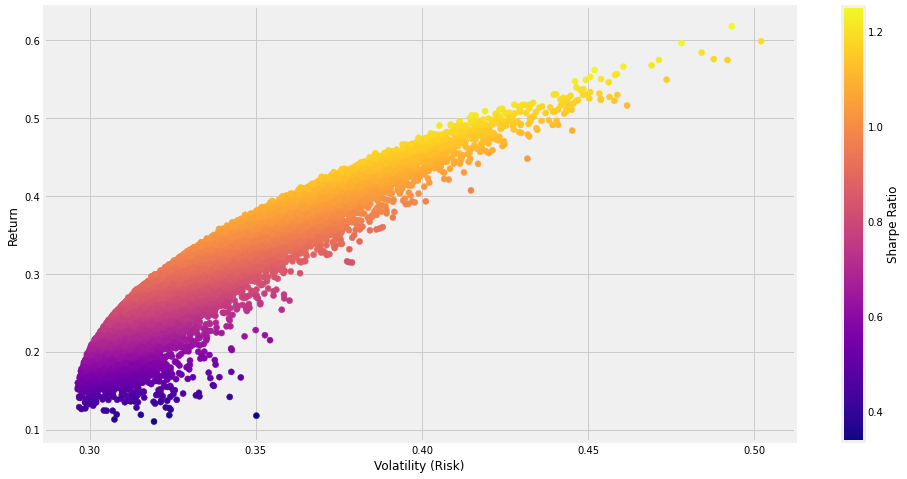

In [52]:
# plot the data
plt.figure(figsize=(15,8))
plt.scatter(opt_vol,opt_ret,c=opt_SR,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')

Let's now put a red dot at the location of the maximum Sharpe Ratio.

To do this we're first going to get the maximum Sharpe Ratio return and the maximum Sharpe Ratio volatility at the optimal allocation index:

In [53]:
max_opt_sr_ret = opt_ret[2330]
max_opt_sr_vol = opt_vol[2330]

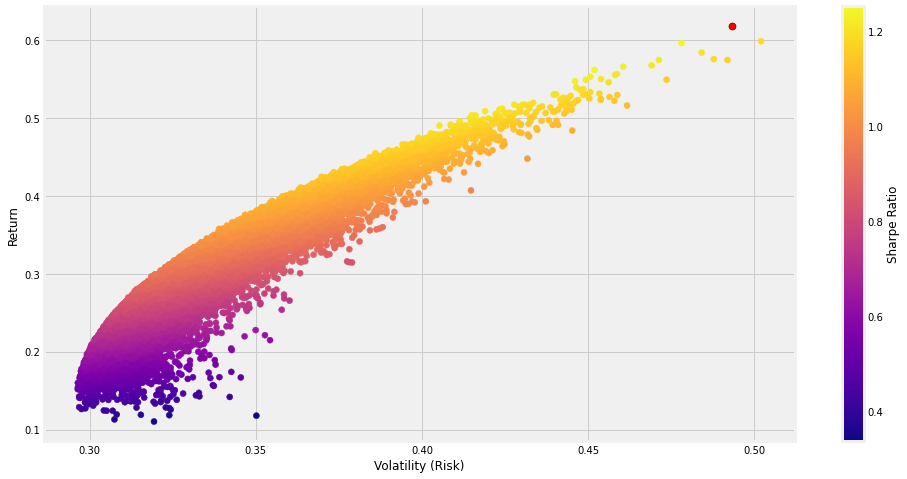

In [54]:
# plot the data
plt.figure(figsize=(15,8))
plt.scatter(opt_vol,opt_ret,c=opt_SR,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')
# add a red dot for max_sr_vol & max_sr_ret
plt.scatter(max_opt_sr_vol, max_opt_sr_ret, c='red', s=50, edgecolors='black')

# observation
graph showing very high return at very high risk

# Markowitz mathematical optimization algorithm
now move on from random allocations to a mathematical optimization algorithm.

All of the heavy lifting for this optimization will be done with SciPy, so we just have to do a few things to set up the optimization function.

Let's start with a simple function that takes in weights and returns back an array consisting of returns, volatility, and the Sharpe Ratio.

We define the function as get_ret_vol_sr and pass in weights
We make sure that weights are a Numpy array
We calculate the return, volatility, and Sharpe Ratio
Return an array of return, volatility, and the Sharpe Ratio


In [55]:
from scipy.optimize import minimize

In [56]:
def get_ret_volt_sr(w): 
    w = np.array(w)
    ret = np.sum(lg_ret.mean() * w) * 252
    volt = np.sqrt(np.dot(w.T,np.dot(lg_ret.cov()*252,w)))
    sr = ret/volt 
    return np.array([ret,volt,sr])

In [57]:
# Markowitz efficient frontier

# To minimize negative Sharpe Ratio

def neg_sharpe(w): 
    return get_ret_volt_sr(w)[2] * -1

In [58]:
# check allocation sums to 1
def check_sum(w): 
    return np.sum(w) - 1

In [59]:
# create constraint variable
cons = ({'type':'eq','fun':check_sum})
cons

{'type': 'eq', 'fun': <function __main__.check_sum(w)>}

In [60]:
 # create a bounds variable—this takes in 4 tuples of 
# the upper and lower bounds for the portfolio allocation weights: 0 and 1.

# create weight boundaries
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1))



In [61]:
# Finally, we need to create an initial guess to start with, and usually, the best initial guess is just an even distribution:
    
    # initial guess
init_guess = [0.25, 0.25, 0.25, 0.25,0.25,0.25,0.25]

Let's now put all of these into the minimization function.

First, we call minimize and pass in what we're trying to minimize—negative Sharpe,
our initial guess, we set the minimization method to SLSQP, and we set our bounds and constraints:



In [62]:
# by mathematical optimization algorithm.
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
opt_results

     fun: -1.2802940790336783
     jac: array([-5.26353717e-04,  4.78611290e-02,  2.01160520e-01,  8.33021998e-02,
        3.33577394e-04,  6.67861700e-02,  3.70684564e-01])
 message: 'Optimization terminated successfully'
    nfev: 56
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([3.87919590e-01, 0.00000000e+00, 8.67361738e-19, 3.16587034e-17,
       6.12080410e-01, 8.67361738e-19, 1.34007389e-16])

In [63]:
opt_results.x

array([3.87919590e-01, 0.00000000e+00, 8.67361738e-19, 3.16587034e-17,
       6.12080410e-01, 8.67361738e-19, 1.34007389e-16])

In [64]:
get_ret_volt_sr(opt_results.x)

array([0.68897573, 0.53813866, 1.28029408])

In [65]:
# by monte carlo simulation

opt_SR.max()

1.2515881133309055

In [68]:
x=1.25 # by monte carlo simulation

In [70]:
y=1.28 # by markowitz 

In [72]:
z = 1.025 # before optimization

In [85]:
index=np.array([1])

result = pd.DataFrame({"index": index,
                       "Monte Carlo" : x,
                       "Markowitz": y,
                       "Before optimization":z})
result

,index,Monte Carlo,Markowitz,Before optimization
0,1,1.25,1.28,1.025
